In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
import pywt

In [2]:
import glob
#for filename in glob.glob('*.txt'):
#print(range(len(glob.glob('*.txt'))-1))
full_list = glob.glob('*.txt')

last_file = full_list[-1]
print(last_file)

full_list.remove(last_file)

new_file = open(last_file, "w")

for filename in full_list:
    with open(filename, "r") as f:
        new_file. write(f. read())    
    
    #with open(os.path.join(os.cwd(), filename), 'r') as f:
        

rearranged.txt


In [3]:
dummy = open("All_files.txt","r")
s = dummy.readlines()

In [4]:
pj = s[1].split('\n')
pj[0].split('\t')

['21',
 '-1e-05',
 '3e-05',
 '-3e-05',
 '1e-05',
 '4e-05',
 '1e-05',
 '-2e-05',
 '-4e-05',
 '0']

In [5]:
word_lst = []
#word_lst.append(s[1].split('\t'))
#print(word_lst)
count = 0
#for i,lines in enumerate(s):
for i in range(len(s)):
    pk = s[i].split('\n')
    words_i = pk[0].split('\t')
    #print(words_i)
    if i < len(s)-1:
        pj = s[i+1].split('\n')
        words_i_plus_one = pj[0].split('\t')
    else:
        break
    #print(words_i_plus_one)
    if words_i[-1] == words_i_plus_one[-1]:
        for j in range(1,9):
            word_lst[-1].append(words_i_plus_one[j])
        #for j in words_i_plus_one:
        #    word_lst[-1].append(j)
    else:
        word_lst.append(words_i_plus_one)
        word_lst[-1].remove(words_i_plus_one[0])
        word_lst[-1].remove(words_i_plus_one[-1])
        if len(word_lst) >= 2:
            word_lst[-2].append(words_i[-1])

In [6]:
average_lst_all = []

In [7]:
for i in word_lst:
    average_lst = [[],[],[],[],[],[],[],[],[]]
    for j,val in enumerate(i):
        if j == len(i) - 1 and val != 'class':
            average_lst[8].append(val)
            break
        if j%8 == 0 and val != 'channel1':
            average_lst[0].append(val)
        elif j%8 == 1 and val != 'channel2':
            average_lst[1].append(val)
        elif j%8 == 2 and val != 'channel3':
            average_lst[2].append(val)
        elif j%8 == 3 and val != 'channel4':
            average_lst[3].append(val)
        elif j%8 == 4 and val != 'channel5':
            average_lst[4].append(val)
        elif j%8 == 5 and val != 'channel6':
            average_lst[5].append(val)
        elif j%8 == 6 and val != 'channel7':
            average_lst[6].append(val)
        elif j%8 == 7 and val != 'channel8':        
            average_lst[7].append(val)

    #print(len(average_lst[0]))
    if len(average_lst[2]) > 5:
        average_lst_all.append(average_lst)

In [8]:
len(average_lst_all)

1812

f = open("rearranged.txt", "w",)
word_lst = []
#word_lst.append(s[1].split('\t'))
#print(word_lst)
count = 0
#for i,lines in enumerate(s):
for i in range(len(s)):
    pk = s[i].split('\n')
    words_i = pk[0].split('\t')
    #print(words_i)
    if i < len(s)-1:
        pj = s[i+1].split('\n')
        words_i_plus_one = pj[0].split('\t')

    if words_i[-1] == words_i_plus_one[-1]:
        #for j in words_i_plus_one:
        #    f.write(',')
        #    f.write(j)
        for j in range(1,9):
            f.write(',')
            f.write(words_i_plus_one[j])
    else:
        f.write(',')
        f.write(words_i[-1])
        f.write('\n')
        #for k in words_i_plus_one:
        #    f.write(',')
        #    f.write(k)
        for k in range(1,9):
            f.write(',')
            f.write(words_i_plus_one[k])
f.close()

In [9]:
average_lst_all[303][8]

['1']

In [10]:
print(range(len(average_lst_all[1811])-1))

range(0, 8)


In [11]:
#Feature1 - Mean Absolute Value
from numpy import mean, absolute
#mean(absolute(data - mean(data)))

mav_list = []

for i,sample in enumerate(average_lst_all):
    mav_i_lst = []
    for channel_num in range(len(sample)-1):
        #print(i)
        data = np.array(sample[channel_num],dtype=float)
        mav = mean(absolute(data - mean(data)))
        mav_i_lst.append(mav)
    mav_list.append(mav_i_lst)

In [11]:
len(mav_list)

1812

In [12]:

import csv

with open("mav.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(mav_list)

In [12]:
#Feature 2
#RMS

rms_list = []
var_list = []
for i,sample in enumerate(average_lst_all):
    rms_i_list = []
    var_i_list = []
    for channel_num in range(len(sample)-1):
        data = np.array(sample[channel_num],dtype=float)
        rms = np.sqrt(np.mean(data**2))
        variance = np.var(data)
        rms_i_list.append(rms)
        var_i_list.append(variance)
    rms_list.append(rms_i_list)
    var_list.append(var_i_list)

In [14]:
len(rms_list)

1812

In [15]:

import csv

with open("rms.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(rms_list)

In [16]:

import csv

with open("var.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(var_list)

In [13]:
#Calculating above in frequency spectrum

import scipy

fft_all_lst = []

for i,sample in enumerate(average_lst_all):
    fft_list = []
    for channel in sample:
        channel_np = np.array(channel,dtype=float)
        fft_lst = scipy.fft(channel_np)
        fft_list.append(fft_lst)
    fft_all_lst.append(fft_list)

In [14]:
len(fft_all_lst)

1812

In [19]:
fft_all_lst[5][6]

array([-0.01598   +0.j        , -0.00905353+0.00031226j,
       -0.00485503+0.00742803j, ..., -0.00555899-0.00762756j,
       -0.00485503-0.00742803j, -0.00905353-0.00031226j])

In [20]:
fft_all_lst[5][1]

array([-0.03616   +0.j        , -0.02587591-0.02669712j,
       -0.01383739+0.02092265j, ..., -0.00077932+0.04789437j,
       -0.01383739-0.02092265j, -0.02587591+0.02669712j])

In [15]:
mav_list_f = []
rms_list_f = []
var_list_f = []
for i,sample in enumerate(fft_all_lst):
    rms_i_list_f = []
    var_i_list_f = []
    mav_i_list_f = []
    for channel_num in range(len(sample)-1):
        data = np.array(sample[channel_num],dtype=float)
        mav_f = mean(absolute(data - mean(data)))
        rms_f = np.sqrt(np.mean(data**2))
        variance_f = np.var(data)
        mav_i_list_f.append(mav_f)
        rms_i_list_f.append(rms_f)
        var_i_list_f.append(variance_f)
    mav_list_f.append(mav_i_list_f)    
    rms_list_f.append(rms_i_list_f)
    var_list_f.append(var_i_list_f)

C:\Users\Priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [23]:


with open("mav_f.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(mav_list_f)

In [24]:


with open("rms_f.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(rms_list_f)

In [25]:


with open("variance_f.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(var_list_f)

In [22]:
classes = []

for i,_ in enumerate(average_lst_all):
    classes.append(average_lst_all[i][8])

In [23]:
len(classes)

1812

In [22]:
with open("all_classes.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(classes)

In [15]:
### Calculating above for frequency-time - Wavelet Transform


In [39]:
import pywt

lst = []

for i in range(50):
    if i%2:
        lst.append(np.sin(2*3.14*i*3))
    else:
        lst.append(np.sin(2*3.14*i*4))

print(lst)


[0.0, -0.009555776105247387, -0.025479699663333223, -0.028663838054878633, -0.0509428548353613, -0.04776143049672075, -0.07637293176746351, -0.06684157800788985, -0.10175341818937007, -0.08589731153723466, -0.12706783403098149, -0.10492167095088824, -0.15229974212319433, -0.12390770757440996, -0.17743275887079388, -0.14284848673081302, -0.20245056489082702, -0.16173709027346514, -0.22733691560899974, -0.1805666191129514, -0.25207565180764013, -0.19933019573703237, -0.2766507101182645, -0.218020966722442, -0.3010461334516327, -0.2366321052384454, -0.3252460813593427, -0.25515681354012487, -0.34923484031913793, -0.2735883254513219, -0.3729968339380753, -0.29191990883604696, -0.3965166330665959, -0.3101448680571302, -0.41977896581698826, -0.32825654642230223, -0.442768727479738, -0.34624832861528526, -0.46547099033132566, -0.3641136431118348, -0.48787101332710314, -0.38184596458021614, -0.5099542516730543, -0.3994388162647997, -0.5317063662696351, -0.41688577235149044, -0.5531132330230359

In [40]:
cA, cD = pywt.dwt(lst, 'bior1.3')

In [41]:
cA

array([-0.00563089, -0.00563089, -0.03941108, -0.07091837, -0.10238825,
       -0.13380411, -0.16514938, -0.19640754, -0.22756211, -0.25859666,
       -0.28949484, -0.32024037, -0.35081706, -0.38120882, -0.41139964,
       -0.44137366, -0.47111512, -0.5006084 , -0.529838  , -0.5587886 ,
       -0.58744502, -0.61579224, -0.64381543, -0.67149993, -0.69883128,
       -0.70375182, -0.70375182])

In [42]:
cD

array([-0.00675695,  0.00675695,  0.00225153, -0.00224961, -0.00673968,
       -0.01121196, -0.0156597 , -0.0200762 , -0.02445477, -0.02878877,
       -0.03307159, -0.03729667, -0.04145749, -0.0455476 , -0.0495606 ,
       -0.05349016, -0.05733004, -0.06107406, -0.06471612, -0.06825023,
       -0.07167047, -0.07497103, -0.07814621, -0.08119042, -0.08409817,
       -0.0868641 ,  0.0868641 ])

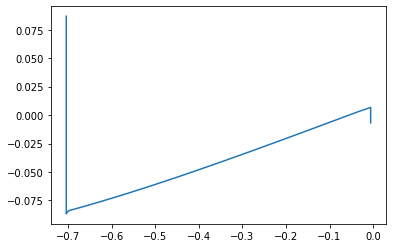

In [43]:
plt.plot(cA,cD)

In [26]:
ch_0_data_0 = average_lst_all[0][0]
ch_1_data_0 = average_lst_all[0][1]

In [43]:
len(average_lst_all[0][7])

617

In [56]:
import pywt
scales = np.arange(1,617)
coeff1,freq1 = pywt.cwt(ch_0_data_0, scales, 'morl')
coeff2,freq2 = pywt.cwt(ch_1_data_0, scales, 'morl')

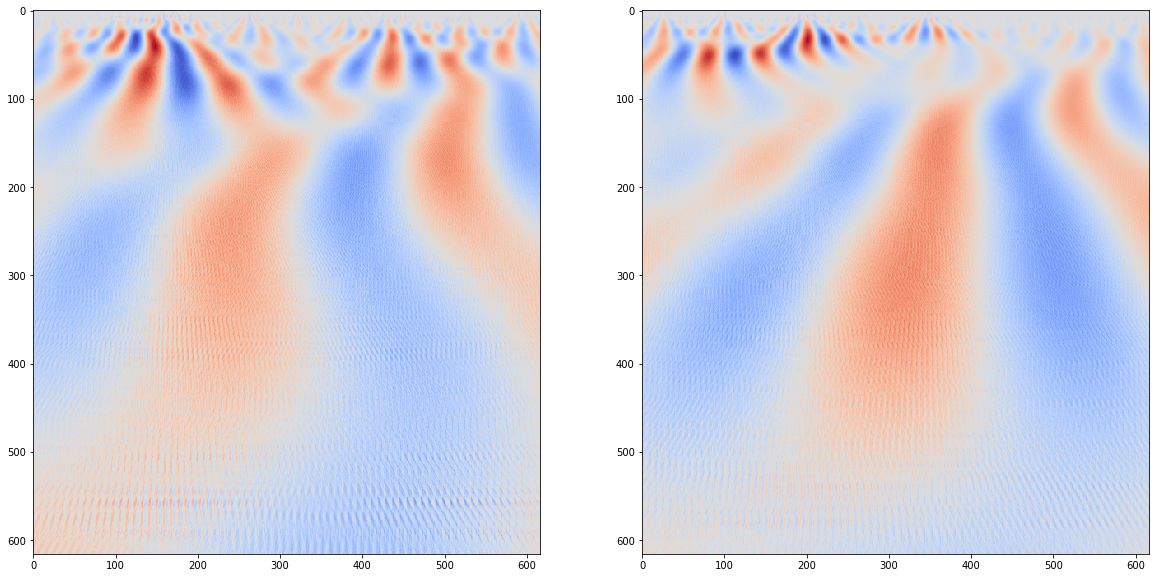

In [57]:
plt.figure(1, figsize=(20,10))
plt.subplot(121)
plt.imshow(coeff1,cmap = 'coolwarm',aspect = 'auto')
plt.subplot(122)
plt.imshow(coeff2,cmap = 'coolwarm',aspect = 'auto')
plt.show()

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

617 616 616 616


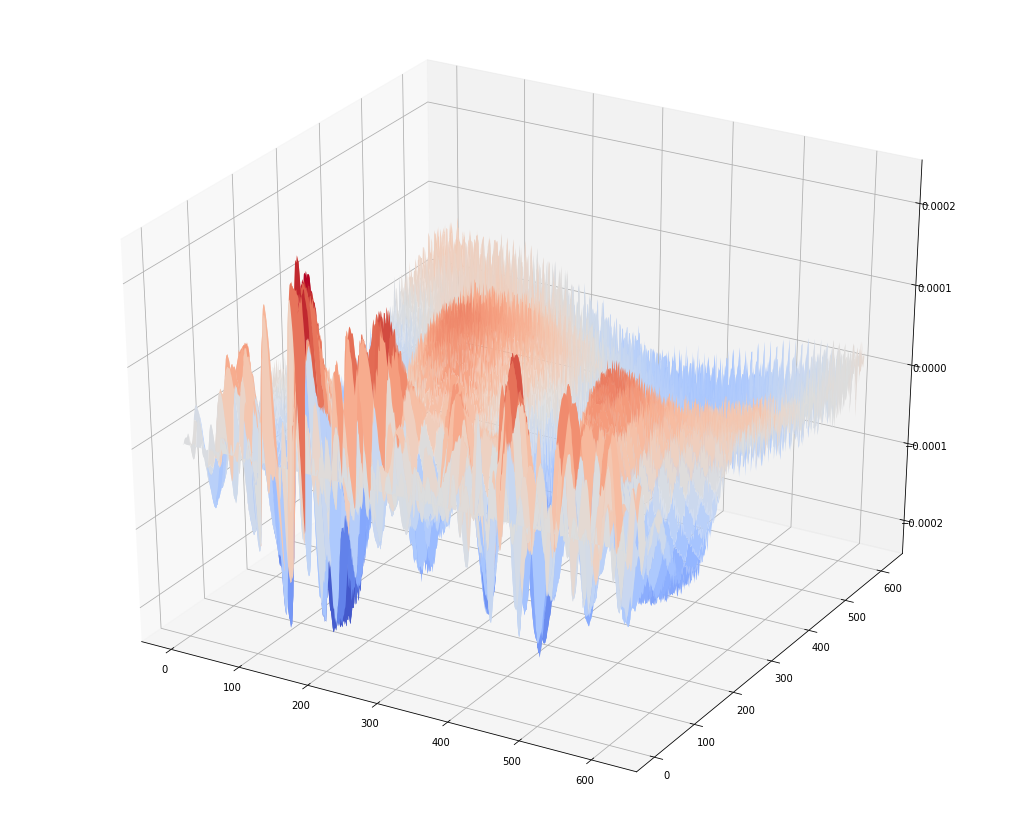

In [58]:
fig = plt.figure(figsize=(40,15))

ax1 = fig.add_subplot(1,2,1,projection = '3d')

Y = np.arange(1,617,1)
X = np.arange(1,618,1)


print(len(X),len(Y),len(coeff1),len(freq1))

X,Y = np.meshgrid(X,Y)

ax1.plot_surface(X,Y,coeff1,cmap=cm.coolwarm,linewidth=0,antialiased=True)

#ax2 = fig.add_subplot(1,2,2,projection = '3d')

#ax2.plot_surface(X,Y,coeff2,cmap=cm.coolwarm,linewidth=0,antialiased=True)

plt.show()

In [67]:
pca = PCA(n_components = 1)
wt_all_lst = []
scales = np.arange(1,617)
for sample in average_lst_all[1500:]:
    #print(sample[8])
    wt_list = []
    for channel in sample[:-1]:
        #print(i)
        #channel_np = np.array(channel,dtype=float)
        coeff,freq = pywt.cwt(channel, scales, 'morl')
        pca_wt = pca.fit_transform(coeff).flatten()
        wt_list.append(pca_wt)
    wt_all_lst.append(wt_list)
    print(len(wt_all_lst))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [29]:
wt_all_lst_0 = wt_all_lst

In [51]:
wt_all_lst_1 = wt_all_lst

In [61]:
wt_all_lst_2 = wt_all_lst

In [68]:
wt_all_lst_3 = wt_all_lst

In [62]:
len(wt_all_lst_2[5][6])

616

In [32]:
import csv
with open("wt_0.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(wt_all_lst_0)

In [20]:
lst = [1,2,3,4]
print(lst[:-1])

[1, 2, 3]


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
coeff,freq = pywt.cwt(average_lst_all[0][2], scales, 'morl')
s = pca.fit_transform(coeff).flatten()
len(s)

AttributeError: type object 'sklearn.utils.seq_dataset.SequentialDataset64' has no attribute '__reduce_cython__'

In [17]:
average_lst_all[9][8]

['5']

In [69]:
mav_list_w = []
rms_list_w = []
var_list_w = []
for i,sample in enumerate(wt_all_lst_3):
    rms_i_list_w = []
    var_i_list_w = []
    mav_i_list_w = []
    for channel_num in range(len(sample)):
        data = np.array(sample[channel_num],dtype=float)
        mav_w = mean(absolute(data - mean(data)))
        rms_w = np.sqrt(np.mean(data**2))
        variance_w = np.var(data)
        mav_i_list_w.append(mav_w)
        rms_i_list_w.append(rms_w)
        var_i_list_w.append(variance_w)
    mav_list_w.append(mav_i_list_w)    
    rms_list_w.append(rms_i_list_w)
    var_list_w.append(var_i_list_w)

In [70]:
with open("mav_w_3.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(mav_list_w)

In [71]:
with open("rms_w_3.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(rms_list_w)

In [72]:
with open("variance_w_3.csv","w+",newline='') as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(var_list_w)